In [1]:
from astropy.io import fits
import subprocess
import copy

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

data_dir_1 = "TSPEC_20211023/"
data_dir_2 = "TSPEC_20211024/"

fits_files_1 = os.listdir(data_dir_1)
fits_files_2 = os.listdir(data_dir_2)
print(fits_files_2)

['image0030.fits', 'image0122.fits', 'image0088.fits', 'image0067.fits', 'image0134.fits', 'image0071.fits', 'image0026.fits', 'image0118.fits', 'image0084.fits', 'image0138.fits', 'image0092.fits', 'image0051.fits', 'image0114.fits', 'image0006.fits', 'image0143.fits', 'image0010.fits', 'image0155.fits', 'image0047.fits', 'image0102.fits', 'image0046.fits', 'image0103.fits', 'image0011.fits', 'image0154.fits', 'image0007.fits', 'image0142.fits', 'image0050.fits', 'image0115.fits', 'image0139.fits', 'image0093.fits', 'image0085.fits', 'image0119.fits', 'image0027.fits', 'image0135.fits', 'image0070.fits', 'image0123.fits', 'image0089.fits', 'image0066.fits', 'image0031.fits', 'image0082.fits', 'image0128.fits', 'image0094.fits', 'image0057.fits', 'image0112.fits', 'image0145.fits', 'image0016.fits', 'image0153.fits', 'image0041.fits', 'image0104.fits', 'image0036.fits', 'image0124.fits', 'image0061.fits', 'image0098.fits', 'image0132.fits', 'image0077.fits', 'image0020.fits', 'image014

In [3]:
hdul1 = fits.open(name=data_dir_1+"image0081.fits", ignore_missing_end=True)
hdul1[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 2048 / length of data axis 1                          
NAXIS2  =                 1024 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
OBJECT  = 'AndVII  '           / object name                                    
SOFTVER = '4.0     '           / software version                               
HDR_REV = '4.3     '        

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

FILENAME_col=[]
RA_col=[]
DEC_col=[]
UTC_col=[]
AIRMASS_col=[]
FILTERNAME_col=[]
OBJECT_col=[]
EXPOSURE_col=[]
COMMENT_col=[]
OBSERVER_col=[]
CATNAME_col=[]

for fits_file in fits_files_1:
    if (fits_file[-5:]==".fits"):
          
        hdu=fits.open(name=data_dir_1+fits_file, ignore_missing_end=True)

        FILENAME_col.append(fits_file)
        RA_col.append(hdu[0].header['RA'])
        DEC_col.append(hdu[0].header['DEC'])
        AIRMASS_col.append(hdu[0].header['AIRMASS'])
        OBJECT_col.append(hdu[0].header['OBJECT'])
        CATNAME_col.append(hdu[0].header['CATNAME'])
        EXPOSURE_col.append(hdu[0].header['EXPTIME']*hdu[0].header['COADDS'])
        COMMENT_col.append(hdu[0].header['COMMENT'])
        OBSERVER_col.append(hdu[0].header['OBSERVER'])
        
log_table = pd.DataFrame(list(zip(FILENAME_col,OBSERVER_col,RA_col,DEC_col,CATNAME_col,AIRMASS_col,OBJECT_col,EXPOSURE_col,COMMENT_col)),columns = ['File Name','Observer', 'RA (deg)', 'Dec (deg)', 'CatName', 'Airmass', 'Object Name', 'Total Exposure Time (s)', 'Comment']);

log_table

,File Name,Observer,RA (deg),Dec (deg),CatName,Airmass,Object Name,Total Exposure Time (s),Comment
0,image0030.fits,,20:37:17.08,-19:22:44.1,2037-1922,1.653,HIP 100448,45.000,[ FITS (Flexible Image Transport System) form...
1,image0088.fits,Arnav Das,04:56:55.32,+51:30:32.2,V347_Aur,1.556,AndVII,120.000,[ FITS (Flexible Image Transport System) form...
2,image0067.fits,Zhen Amanda,23:26:35.06,+50:40:34.6,2326+5040,1.055,AndVII,300.000,[ FITS (Flexible Image Transport System) form...
3,image0071.fits,Zhen Amanda,23:26:35.03,+50:40:35.6,2326+5040,1.049,AndVII,300.000,[ FITS (Flexible Image Transport System) form...
4,image0026.fits,,20:22:12.15,-15:37:51.1,HIP_100448,1.525,HIP 100448,30.000,[ FITS (Flexible Image Transport System) form...
5,image0118.fits,Zhen Amanda,04:41:51.74,+16:15:50.7,Ceres,1.271,Ceres,60.000,[ FITS (Flexible Image Transport System) form...
6,image0084.fits,Arnav Das,04:56:55.28,+51:30:32.2,V347_Aur,1.610,AndVII,60.000,[ FITS (Flexible Image Transport System) form...
7,image0092.fits,Arnav Das,05:14:42.40,+53:12:32.7,HIP24451,1.603,AndVII,10.000,[ FITS (Flexible Image Transport System) form...
8,image0051.fits,unknown,22:45:59.54,-08:51:58.7,Pallas,1.403,Pallas,60.000,[ FITS (Flexible Image Transport System) form...
9,image0114.fits,Zhen Amanda,04:41:51.94,+16:15:49.1,Ceres,1.312,Ceres,60.000,[ FITS (Flexible Image Transport System) form...


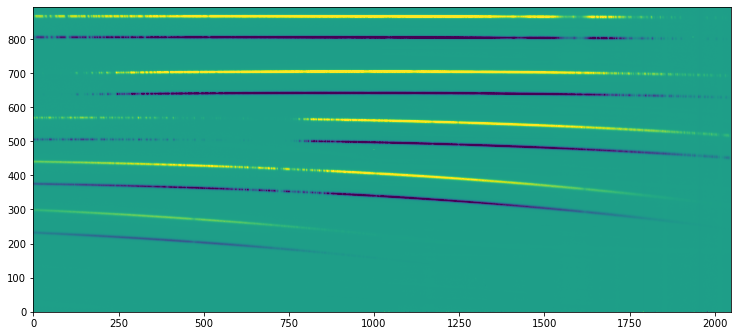

In [5]:
hdul_cal_A1 = fits.open(name=data_dir_1+"image0089.fits", ignore_missing_end=True)
hdul_cal_B1 = fits.open(name=data_dir_1+"image0090.fits", ignore_missing_end=True)
hdul_cal_B2 = fits.open(name=data_dir_1+"image0091.fits", ignore_missing_end=True)
hdul_cal_A2 = fits.open(name=data_dir_1+"image0092.fits", ignore_missing_end=True)

cal_A1 = np.array(hdul_cal_A1[0].data,dtype='float')/10
cal_B1 = np.array(hdul_cal_B1[0].data,dtype='float')/10
cal_B2 = np.array(hdul_cal_B2[0].data,dtype='float')/10
cal_A2 = np.array(hdul_cal_A2[0].data,dtype='float')/10

cal_star_raw = cal_A1+cal_A2-cal_B1-cal_B2
cal_star = cal_star_raw[127:1023][:]

plt.figure(figsize=(12.5,7.5))
plt.imshow(cal_star,origin='lower',vmin=np.percentile(cal_star,1),vmax=np.percentile(cal_star,99))

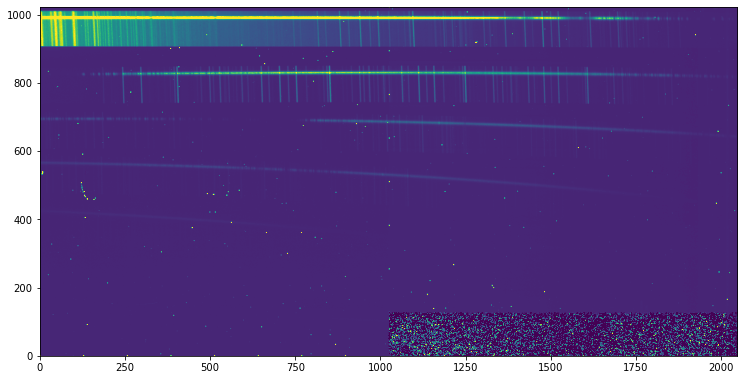

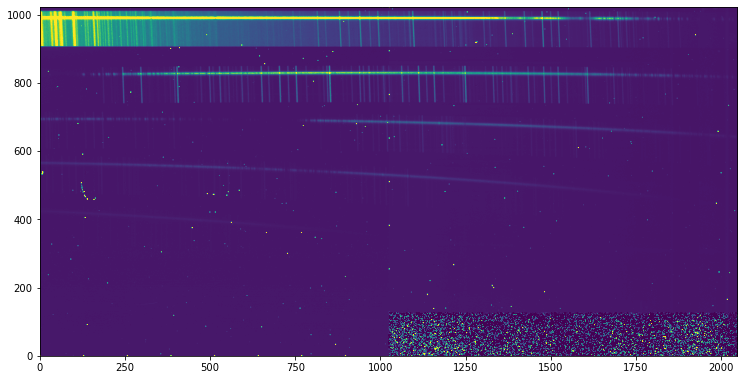

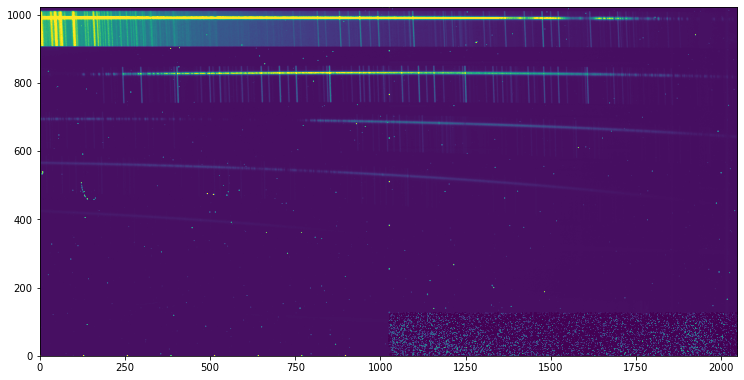

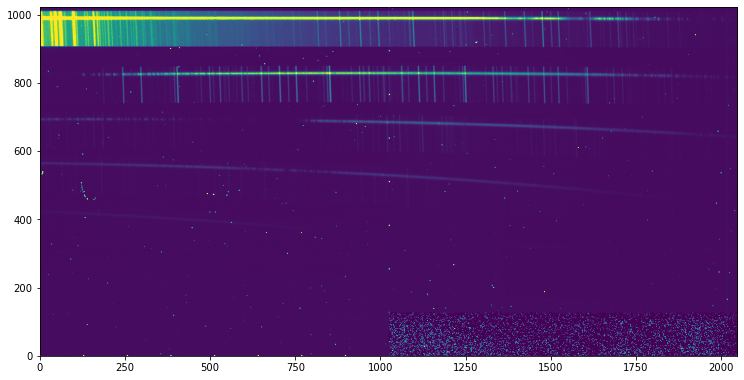

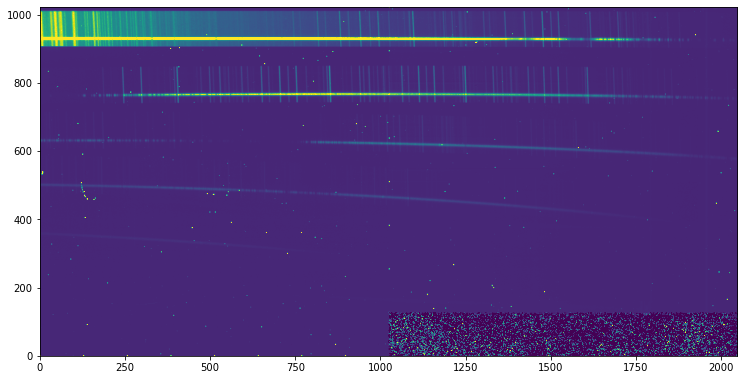

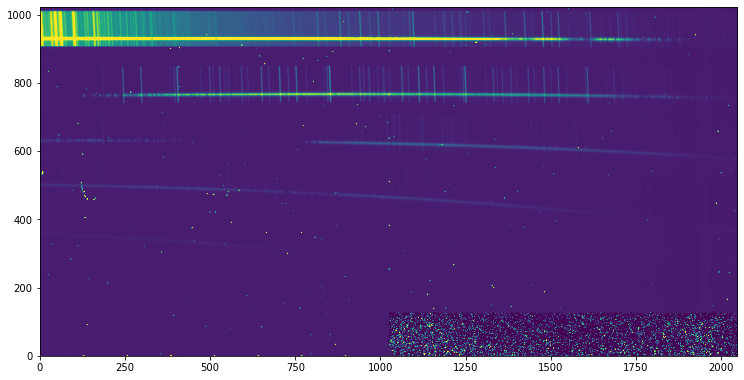

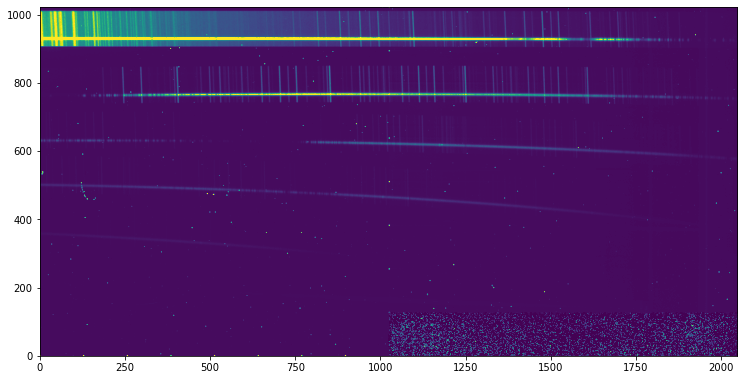

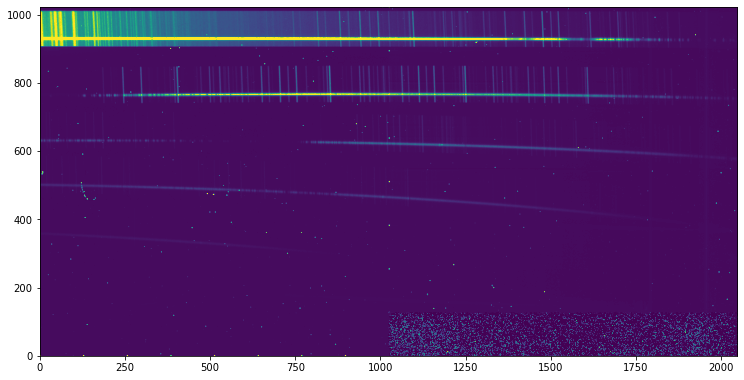

In [6]:
hdul_A1 = fits.open(name=data_dir_1+"image0081.fits", ignore_missing_end=True)
hdul_A2 = fits.open(name=data_dir_1+"image0084.fits", ignore_missing_end=True)
hdul_A3 = fits.open(name=data_dir_1+"image0085.fits", ignore_missing_end=True)
hdul_A4 = fits.open(name=data_dir_1+"image0088.fits", ignore_missing_end=True)

A1 = np.array(hdul_A1[0].data,dtype='float')/60
A2 = np.array(hdul_A2[0].data,dtype='float')/60
A3 = np.array(hdul_A3[0].data,dtype='float')/120
A4 = np.array(hdul_A4[0].data,dtype='float')/120

A = A1+A2+A3+A4

hdul_B1 = fits.open(name=data_dir_1+"image0082.fits", ignore_missing_end=True)
hdul_B2 = fits.open(name=data_dir_1+"image0083.fits", ignore_missing_end=True)
hdul_B3 = fits.open(name=data_dir_1+"image0086.fits", ignore_missing_end=True)
hdul_B4 = fits.open(name=data_dir_1+"image0087.fits", ignore_missing_end=True)

B1 = np.array(hdul_B1[0].data,dtype='float')/60
B2 = np.array(hdul_B2[0].data,dtype='float')/60
B3 = np.array(hdul_B3[0].data,dtype='float')/120
B4 = np.array(hdul_B4[0].data,dtype='float')/120

B = B1+B2+B3+B4

spectrograms = [A1,A2,A3,A4,B1,B2,B3,B4]

for spectrogram in spectrograms:
    plt.figure(figsize=(12.5,7.5))
    plt.imshow(spectrogram,origin='lower',vmin=np.percentile(spectrogram,1),vmax=np.percentile(spectrogram,99))

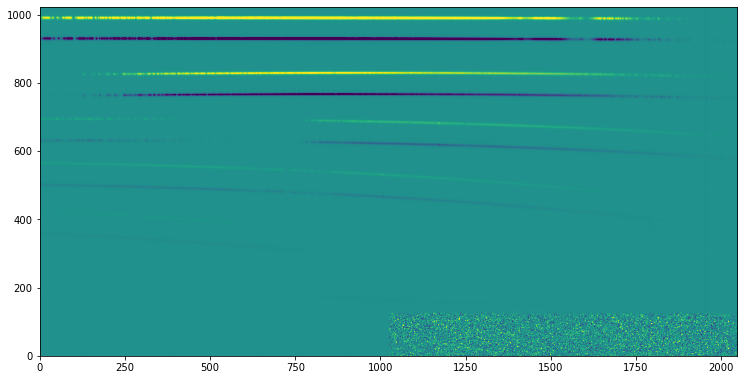

In [7]:
star_raw = A-B
plt.figure(figsize=(12.5,7.5))
plt.imshow(star_raw,origin='lower',vmin=np.percentile(star_raw,1),vmax=np.percentile(star_raw,99))

### Cropping the bottom

In [8]:
star = star_raw[127:1023][:]

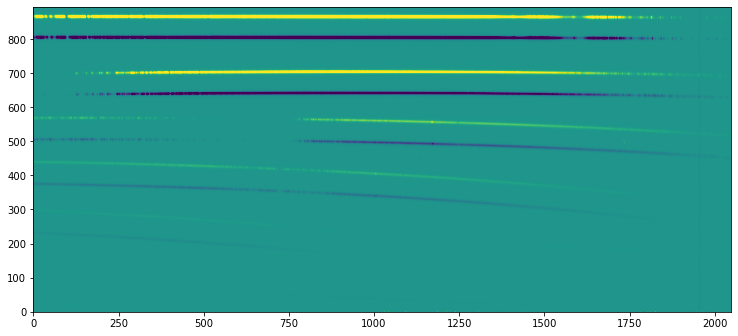

In [9]:
plt.figure(figsize=(12.5,7.5))
plt.imshow(star,origin='lower',vmin=np.percentile(star,1),vmax=np.percentile(star,99))

### Flat-field corrections

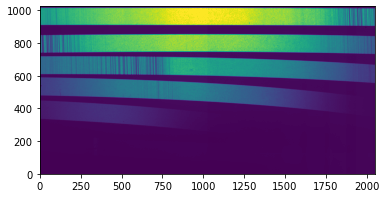

In [10]:
hdul_dark1 = fits.open(name=data_dir_1+"image0001.fits", ignore_missing_end=True)
hdul_dark2 = fits.open(name=data_dir_1+"image0002.fits", ignore_missing_end=True)
hdul_dark3 = fits.open(name=data_dir_1+"image0003.fits", ignore_missing_end=True)
hdul_dark4 = fits.open(name=data_dir_1+"image0004.fits", ignore_missing_end=True)
hdul_dark5 = fits.open(name=data_dir_1+"image0005.fits", ignore_missing_end=True)
hdul_dark6 = fits.open(name=data_dir_1+"image0006.fits", ignore_missing_end=True)
hdul_dark7 = fits.open(name=data_dir_1+"image0007.fits", ignore_missing_end=True)
hdul_dark8 = fits.open(name=data_dir_1+"image0008.fits", ignore_missing_end=True)
hdul_dark9 = fits.open(name=data_dir_1+"image0009.fits", ignore_missing_end=True)
hdul_dark10 = fits.open(name=data_dir_1+"image0010.fits", ignore_missing_end=True)

dark1 = np.array(hdul_dark1[0].data,dtype='float')/30
dark2 = np.array(hdul_dark2[0].data,dtype='float')/30
dark3 = np.array(hdul_dark3[0].data,dtype='float')/30
dark4 = np.array(hdul_dark4[0].data,dtype='float')/30
dark5 = np.array(hdul_dark5[0].data,dtype='float')/30
dark6 = np.array(hdul_dark6[0].data,dtype='float')/30
dark7 = np.array(hdul_dark7[0].data,dtype='float')/30
dark8 = np.array(hdul_dark8[0].data,dtype='float')/30
dark9 = np.array(hdul_dark9[0].data,dtype='float')/30
dark10 = np.array(hdul_dark10[0].data,dtype='float')/30

hdul_flat1 = fits.open(name=data_dir_1+"image0011.fits", ignore_missing_end=True)
hdul_flat2 = fits.open(name=data_dir_1+"image0012.fits", ignore_missing_end=True)
hdul_flat3 = fits.open(name=data_dir_1+"image0013.fits", ignore_missing_end=True)
hdul_flat4 = fits.open(name=data_dir_1+"image0014.fits", ignore_missing_end=True)
hdul_flat5 = fits.open(name=data_dir_1+"image0015.fits", ignore_missing_end=True)
hdul_flat6 = fits.open(name=data_dir_1+"image0016.fits", ignore_missing_end=True)
hdul_flat7 = fits.open(name=data_dir_1+"image0017.fits", ignore_missing_end=True)
hdul_flat8 = fits.open(name=data_dir_1+"image0018.fits", ignore_missing_end=True)
hdul_flat9 = fits.open(name=data_dir_1+"image0019.fits", ignore_missing_end=True)
hdul_flat10 = fits.open(name=data_dir_1+"image0020.fits", ignore_missing_end=True)

#take median of every pixel set beforehand
flat1 = np.array(hdul_flat1[0].data,dtype='float')/30
flat2 = np.array(hdul_flat2[0].data,dtype='float')/30
flat3 = np.array(hdul_flat3[0].data,dtype='float')/30
flat4 = np.array(hdul_flat4[0].data,dtype='float')/30
flat5 = np.array(hdul_flat5[0].data,dtype='float')/30
flat6 = np.array(hdul_flat6[0].data,dtype='float')/30
flat7 = np.array(hdul_flat7[0].data,dtype='float')/30
flat8 = np.array(hdul_flat8[0].data,dtype='float')/30
flat9 = np.array(hdul_flat9[0].data,dtype='float')/30
flat10 = np.array(hdul_flat10[0].data,dtype='float')/30

median_flat=np.zeros(flat1.shape)
median_dark=np.zeros(dark1.shape)

for i_r in range(0,flat1[:,0].shape[0]):
    for i_c in range(0,flat2[0,:].shape[0]):
        median_flat[i_r,i_c]=np.median((flat1[i_r,i_c],flat2[i_r,i_c],flat3[i_r,i_c],flat4[i_r,i_c],flat5[i_r,i_c],flat6[i_r,i_c],flat7[i_r,i_c],flat8[i_r,i_c],flat9[i_r,i_c],flat10[i_r,i_c]))
        median_dark[i_r,i_c]=np.median((dark1[i_r,i_c],dark2[i_r,i_c],dark3[i_r,i_c],dark4[i_r,i_c],dark5[i_r,i_c],dark6[i_r,i_c],dark7[i_r,i_c],dark8[i_r,i_c],dark9[i_r,i_c],dark10[i_r,i_c]))

master_flat = median_flat-median_dark
master_flat = master_flat/(10*np.median(master_flat[200:1000,:]))

plt.close()
plt.imshow(master_flat,origin='lower',vmin=np.percentile(master_flat,1),vmax=np.percentile(master_flat,99))

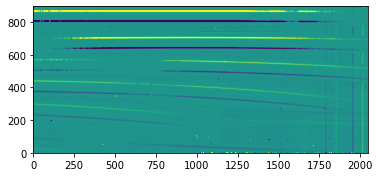

In [11]:
star_flat = star/master_flat[127:1023][:]

plt.close()
plt.imshow(star_flat,origin='lower',vmin=np.percentile(star_flat,1),vmax=np.percentile(star_flat,99))

In [12]:
star_range1 = star_flat[785:880][:]
star_range2 = star_flat[601:718][:]
star_range3 = star_flat[443:587][:]
star_range4 = star_flat[245:452][:]
star_range5 = star_flat[85:312,0:1000]

In [13]:
cal_star_flat=cal_star/master_flat[127:1023][:]

cal_star_range1 = cal_star[785:880][:]
cal_star_range2 = cal_star[601:718][:]
cal_star_range3 = cal_star[443:587][:]
cal_star_range4 = cal_star[245:452][:]
cal_star_range5 = cal_star[85:312,0:1000]

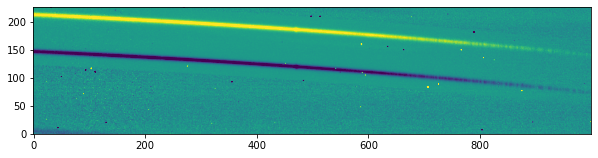

In [14]:
plt.figure(figsize=(10,5))
plt.imshow(star_range5,origin='lower',vmin=np.percentile(star_range5,1),vmax=np.percentile(star_range5,99))

In [15]:
from scipy.signal import find_peaks

trace_array=[]

for i in range(cal_star.shape[1]): 
    column = cal_star[:,i]
    peaks, _ = find_peaks(column,prominence=75)
    trace_array.append(peaks)
    
trace_array

[array([299, 440, 568, 864]),
 array([298, 441, 569, 864]),
 array([299, 440, 569]),
 array([299, 440, 569]),
 array([300, 440, 569, 866]),
 array([299, 440, 568, 866]),
 array([298, 440, 568, 867]),
 array([299, 394, 440, 569, 867]),
 array([300, 440, 568, 867]),
 array([299, 439, 569, 867]),
 array([297, 439, 569, 867]),
 array([300, 440, 569, 867]),
 array([299, 440, 568, 867]),
 array([299, 440, 568, 866]),
 array([297, 441, 568, 866]),
 array([298, 440, 568, 866]),
 array([298, 440, 568, 868]),
 array([298, 441, 569, 867]),
 array([298, 441, 569, 866]),
 array([297, 440, 569, 866]),
 array([298, 440, 570, 867]),
 array([299, 441, 568, 866]),
 array([299, 441, 570, 867]),
 array([297, 440, 570, 867]),
 array([298, 440, 569, 866]),
 array([298, 440, 570, 866]),
 array([298, 440, 569, 867]),
 array([298, 439, 568, 866]),
 array([298, 440, 568, 866]),
 array([297, 440, 568, 866]),
 array([297, 439, 569, 863]),
 array([296, 440, 569, 863]),
 array([297, 440, 570, 867]),
 array([297, 44

### Spatial Rectification

In [16]:
def outlier_smoother(x, m=1.5, win=75):
    ''' finds outliers in x, points > m*mdev(x) [mdev:median deviation] 
    and replaces them with the median of win points around them '''
    x_corr = np.copy(x)
    d = np.abs(x - np.median(x))
    mdev = np.median(d)
    idxs_outliers = np.nonzero(d > m*mdev)[0]
    for i in idxs_outliers:
        if i-win < 0:
            x_corr[i] = np.median(np.append(x[0:i], x[i+1:i+win+1]))
        elif i+win+1 > len(x):
            x_corr[i] = np.median(np.append(x[i-win:i], x[i+1:len(x)]))
        else:
            x_corr[i] = np.median(np.append(x[i-win:i], x[i+1:i+win+1]))
    
    return x_corr

def findTraces(im):
    
    upper_trace = np.zeros(im.shape[1],dtype=int)
    lower_trace = np.zeros(im.shape[1],dtype=int)

    for i in range(0,im.shape[1]):
        upper_trace[i]=int(np.argmax(im[:,i]))
        lower_trace[i]=int(np.argmin(im[:,i]))
    
    return upper_trace,lower_trace

def straighten_spectrum(im, trace):
    
    new_im = np.array([np.roll(im[:,0],im.shape[0]//2-1*trace[0])])
    
    for i in range(1,im.shape[1]):
        col=im[:,i]
        new_col=np.array([np.roll(col,im.shape[0]//2-1*trace[i])])
        
        new_im = np.append(new_im,new_col,axis=0)
        
    return new_im.T

In [17]:
upper_trace_calstar1, lower_trace_calstar1 = findTraces(cal_star_range1)

upper_trace_calstar2, lower_trace_calstar2 = findTraces(cal_star_range2)

upper_trace_calstar3, lower_trace_calstar3 = findTraces(cal_star_range3)

upper_trace_calstar4, lower_trace_calstar4 = findTraces(cal_star_range4)

upper_trace_calstar5, lower_trace_calstar5 = findTraces(cal_star_range5)

upper_trace_calstar1=outlier_smoother(outlier_smoother(upper_trace_calstar1))
lower_trace_calstar1=outlier_smoother(outlier_smoother(lower_trace_calstar1))

upper_trace_calstar2=outlier_smoother(outlier_smoother(upper_trace_calstar2))
lower_trace_calstar2=outlier_smoother(outlier_smoother(lower_trace_calstar2))

upper_trace_calstar3=outlier_smoother(outlier_smoother(upper_trace_calstar3,win=175))
lower_trace_calstar3=outlier_smoother(outlier_smoother(lower_trace_calstar3,win=175))

upper_trace_calstar4=outlier_smoother(outlier_smoother(upper_trace_calstar4))
lower_trace_calstar4=outlier_smoother(outlier_smoother(lower_trace_calstar4))

upper_trace_calstar5=outlier_smoother(outlier_smoother(upper_trace_calstar5, win=35))
lower_trace_calstar5=outlier_smoother(outlier_smoother(lower_trace_calstar5, win=35))

upper_trace_calstar4[-1]=75

upper_trace_calstar4[-23]=76

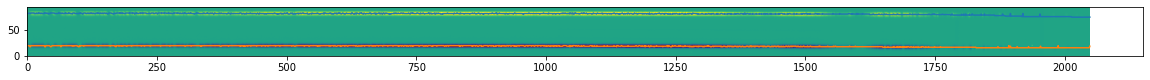

In [18]:
plt.figure(figsize=(20,15))
plt.imshow(cal_star_range1,origin='lower',vmin=np.percentile(cal_star_range1,1),vmax=np.percentile(cal_star_range1,99))

upper_trace_calstar1[-1]=74

plt.plot(np.linspace(1,cal_star_range1.shape[1],num=cal_star_range1.shape[1],endpoint=True,dtype=int),upper_trace_calstar1)
plt.plot(np.linspace(1,cal_star_range1.shape[1],num=cal_star_range1.shape[1],endpoint=True,dtype=int),lower_trace_calstar1)

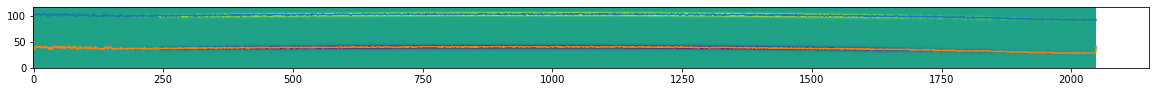

In [19]:
plt.figure(figsize=(20,15))
plt.imshow(cal_star_range2,origin='lower',vmin=np.percentile(cal_star_range2,1),vmax=np.percentile(cal_star_range2,99))

upper_trace_calstar2[-1]=92

plt.plot(np.linspace(1,cal_star_range2.shape[1],num=cal_star_range2.shape[1],endpoint=True,dtype=int),upper_trace_calstar2)
plt.plot(np.linspace(1,cal_star_range2.shape[1],num=cal_star_range2.shape[1],endpoint=True,dtype=int),lower_trace_calstar2)

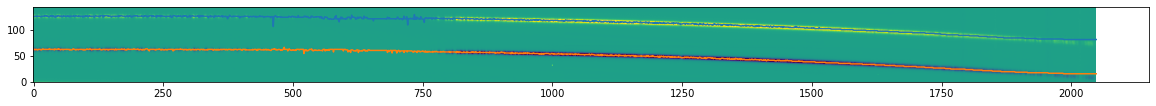

In [20]:
cal_star_range3[480:750] = outlier_smoother(cal_star_range3[480:750],win=75)

plt.figure(figsize=(20,15))
plt.imshow(cal_star_range3,origin='lower',vmin=np.percentile(cal_star_range3,1),vmax=np.percentile(cal_star_range3,99))

plt.plot(np.linspace(1,cal_star_range3.shape[1],num=cal_star_range3.shape[1],endpoint=True,dtype=int),upper_trace_calstar3)
plt.plot(np.linspace(1,cal_star_range3.shape[1],num=cal_star_range3.shape[1],endpoint=True,dtype=int),lower_trace_calstar3)

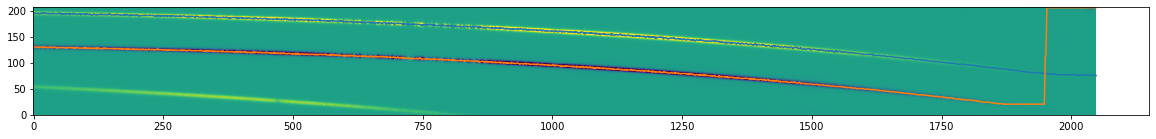

In [21]:
plt.figure(figsize=(20,15))
plt.imshow(cal_star_range4,origin='lower',vmin=np.percentile(cal_star_range4,1),vmax=np.percentile(cal_star_range4,99))

plt.plot(np.linspace(1,cal_star_range4.shape[1],num=cal_star_range4.shape[1],endpoint=True,dtype=int),upper_trace_calstar4)
plt.plot(np.linspace(1,cal_star_range4.shape[1],num=cal_star_range4.shape[1],endpoint=True,dtype=int),lower_trace_calstar4)

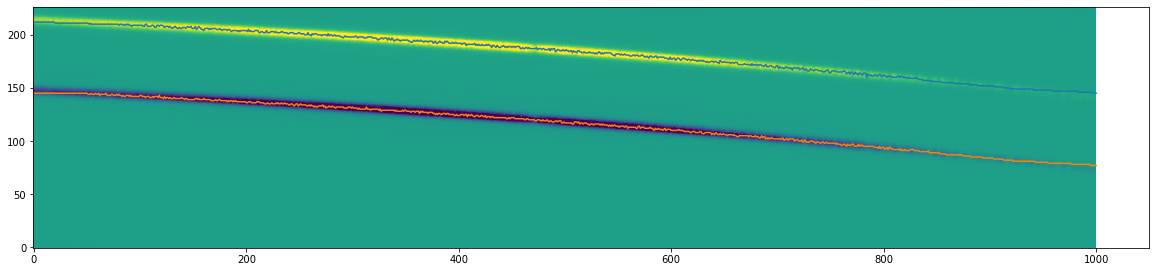

In [22]:
plt.figure(figsize=(20,15))
plt.imshow(cal_star_range5,origin='lower',vmin=np.percentile(cal_star_range5,1),vmax=np.percentile(cal_star_range5,99))

plt.plot(np.linspace(1,cal_star_range5.shape[1],num=cal_star_range5.shape[1],endpoint=True,dtype=int),upper_trace_calstar5)
plt.plot(np.linspace(1,cal_star_range5.shape[1],num=cal_star_range5.shape[1],endpoint=True,dtype=int),lower_trace_calstar5)

In [23]:
rectified_star1 = straighten_spectrum(star_range1,upper_trace_calstar1+65)
rectified_star2 = straighten_spectrum(star_range2,upper_trace_calstar2+80)
rectified_star3 = straighten_spectrum(star_range3,upper_trace_calstar3+100)
rectified_star4 = straighten_spectrum(star_range4,upper_trace_calstar4+150)
rectified_star4=rectified_star4[50:-10][:]
rectified_star5 = straighten_spectrum(star_range5,upper_trace_calstar5+180)
rectified_star5=rectified_star5[50:200]

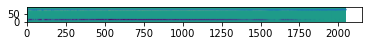

In [24]:
plt.figure(figsize=(10,5))
plt.close()
plt.imshow(rectified_star1,origin='lower',vmin=np.percentile(rectified_star1,1),vmax=np.percentile(rectified_star1,99))

y_upper_star1, _ = findTraces(rectified_star1)
y_upper_star1 = outlier_smoother(outlier_smoother(y_upper_star1))

plt.plot(np.linspace(1,rectified_star1.shape[1],num=rectified_star1.shape[1],endpoint=True,dtype=int),y_upper_star1)

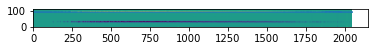

In [25]:
#plt.figure(figsize=(20,15))
plt.close()
plt.imshow(rectified_star2,origin='lower',vmin=np.percentile(rectified_star2,1),vmax=np.percentile(rectified_star2,99))

y_upper_star2, _ = findTraces(rectified_star2)
y_upper_star2 = outlier_smoother(outlier_smoother(y_upper_star2))

plt.plot(np.linspace(1,rectified_star2.shape[1],num=rectified_star2.shape[1],endpoint=True,dtype=int),y_upper_star2)

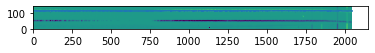

In [26]:
#plt.figure(figsize=(20,15))
%matplotlib inline

plt.close()
plt.imshow(rectified_star3,origin='lower',vmin=np.percentile(rectified_star3,1),vmax=np.percentile(rectified_star3,99))

y_upper_star3, _ = findTraces(rectified_star3)
y_upper_star3 = outlier_smoother(outlier_smoother(y_upper_star3),win=200)

plt.plot(np.linspace(1,rectified_star3.shape[1],num=rectified_star3.shape[1],endpoint=True,dtype=int),y_upper_star3)

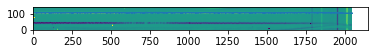

In [27]:
#plt.figure(figsize=(20,15))
plt.close()
plt.imshow(rectified_star4,origin='lower',vmin=np.percentile(rectified_star4,1),vmax=np.percentile(rectified_star4,99))

y_upper_star4, _ = findTraces(rectified_star4)
y_upper_star4 = outlier_smoother(outlier_smoother(y_upper_star4))

plt.plot(np.linspace(1,rectified_star4.shape[1],num=rectified_star4.shape[1],endpoint=True,dtype=int),y_upper_star4)

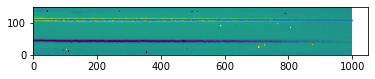

In [28]:
%matplotlib inline

rectified_star5[125:135,0:120]=0

#plt.figure(figsize=(20,15))
plt.close()
plt.imshow(rectified_star5,origin='lower',vmin=np.percentile(rectified_star5,1),vmax=np.percentile(rectified_star5,99))

y_upper_star5, _ = findTraces(rectified_star5)
y_upper_star5 = outlier_smoother(outlier_smoother(y_upper_star5))

plt.plot(np.linspace(1,rectified_star5.shape[1],num=rectified_star5.shape[1],endpoint=True,dtype=int),y_upper_star5)

In [29]:
a=7
b=17
c=25

In [30]:
signal_arr_star1 = np.zeros(rectified_star1.shape[1])
background_arr_star1 = np.zeros(rectified_star1.shape[1])

for i in range(0,rectified_star1.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_star1[i] += rectified_star1[y_upper_star1.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_star1[i] += rectified_star1[y_upper_star1.astype(int)[i]+j][i]+rectified_star1[y_upper_star1.astype(int)[i]-j][i]

background_arr_star1 = background_arr_star1/(c-b+1)

In [31]:
signal_arr_star2 = np.zeros(rectified_star2.shape[1])
background_arr_star2 = np.zeros(rectified_star2.shape[1])

for i in range(0,rectified_star2.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_star2[i] += rectified_star2[y_upper_star2.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_star2[i] += rectified_star2[y_upper_star2.astype(int)[i]+j][i]+rectified_star2[y_upper_star2.astype(int)[i]-j][i]

background_arr_star2 = background_arr_star2/(c-b+1)

In [32]:
signal_arr_star3 = np.zeros(rectified_star3.shape[1])
background_arr_star3 = np.zeros(rectified_star3.shape[1])

for i in range(0,rectified_star3.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_star3[i] += rectified_star3[y_upper_star3.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_star3[i] += rectified_star3[y_upper_star3.astype(int)[i]+j][i]+rectified_star3[y_upper_star3.astype(int)[i]-j][i]

background_arr_star3 = background_arr_star3/(c-b+1)

In [33]:
signal_arr_star4 = np.zeros(rectified_star4.shape[1])
background_arr_star4 = np.zeros(rectified_star4.shape[1])

for i in range(0,rectified_star4.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_star4[i] += rectified_star4[y_upper_star4.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_star4[i] += rectified_star4[y_upper_star4.astype(int)[i]+j][i]+rectified_star4[y_upper_star4.astype(int)[i]-j][i]

background_arr_star4 = background_arr_star4/(c-b+1)

In [34]:
signal_arr_star5 = np.zeros(rectified_star5.shape[1])
background_arr_star5 = np.zeros(rectified_star5.shape[1])

for i in range(0,rectified_star5.shape[1]):
    for j in range(-1*a,a+1):
        signal_arr_star5[i] += rectified_star5[y_upper_star5.astype(int)[i]+j][i]
    for j in range(c,b+1):
        background_arr_star5[i] += rectified_star5[y_upper_star5.astype(int)[i]+j][i]+rectified_star5[y_upper_star5.astype(int)[i]-j][i]

background_arr_star5 = background_arr_star5/(c-b+1)

### Extracting the spectrum

Text(0.5, 0, 'pixel')

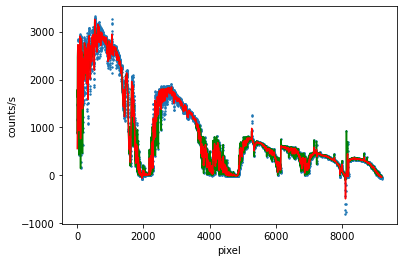

In [35]:
spectrum_star1 = signal_arr_star1-2*a*background_arr_star1
spectrum_star2 = signal_arr_star2-2*a*background_arr_star2
spectrum_star3 = signal_arr_star3-2*a*background_arr_star3
spectrum_star4 = signal_arr_star4-2*a*background_arr_star4
spectrum_star5 = signal_arr_star5-2*a*background_arr_star5

spectrum_star=spectrum_star1
spectrum_star=np.append(spectrum_star,spectrum_star2)
spectrum_star=np.append(spectrum_star,spectrum_star3)
spectrum_star=np.append(spectrum_star,spectrum_star4)
spectrum_star=np.append(spectrum_star,spectrum_star5)

kernel_size=10
kernel = np.ones(kernel_size)/kernel_size
smoothened_spectrum = np.convolve(spectrum_star,kernel,mode='same')
median_smoothened_spectrum = outlier_smoother(spectrum_star,win=kernel_size)

plt.close()

plt.scatter(np.linspace(1,rectified_star1.shape[1]+rectified_star2.shape[1]+rectified_star3.shape[1]+rectified_star4.shape[1]+rectified_star5.shape[1],num=rectified_star1.shape[1]+rectified_star2.shape[1]+rectified_star3.shape[1]+rectified_star4.shape[1]+rectified_star5.shape[1],endpoint=True,dtype=int),spectrum_star,s=2)
plt.plot(np.linspace(1,rectified_star1.shape[1]+rectified_star2.shape[1]+rectified_star3.shape[1]+rectified_star4.shape[1]+rectified_star5.shape[1],num=rectified_star1.shape[1]+rectified_star2.shape[1]+rectified_star3.shape[1]+rectified_star4.shape[1]+rectified_star5.shape[1],endpoint=True,dtype=int),median_smoothened_spectrum,c='g')
plt.plot(np.linspace(1,rectified_star1.shape[1]+rectified_star2.shape[1]+rectified_star3.shape[1]+rectified_star4.shape[1]+rectified_star5.shape[1],num=rectified_star1.shape[1]+rectified_star2.shape[1]+rectified_star3.shape[1]+rectified_star4.shape[1]+rectified_star5.shape[1],endpoint=True,dtype=int),smoothened_spectrum,c='r')
plt.ylabel('counts/s')
plt.xlabel('pixel')

Text(0.5, 0, 'pixel')

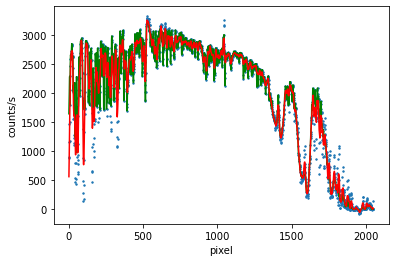

In [36]:
spectrum_star1 = signal_arr_star1-2*a*background_arr_star1

kernel_size=10
kernel = np.ones(kernel_size)/kernel_size
smoothened_spectrum1 = np.convolve(spectrum_star1,kernel,mode='same')
median_smoothened_spectrum1 = outlier_smoother(spectrum_star1,win=kernel_size)

plt.close()

plt.scatter(np.linspace(1,rectified_star1.shape[1],num=rectified_star1.shape[1],endpoint=True,dtype=int),spectrum_star1,s=2)
plt.plot(np.linspace(1,rectified_star1.shape[1],num=rectified_star1.shape[1],endpoint=True,dtype=int),median_smoothened_spectrum1,c='g')
plt.plot(np.linspace(1,rectified_star1.shape[1],num=rectified_star1.shape[1],endpoint=True,dtype=int),smoothened_spectrum1,c='r')

plt.ylabel('counts/s')
plt.xlabel('pixel')

Text(0.5, 0, 'pixel')

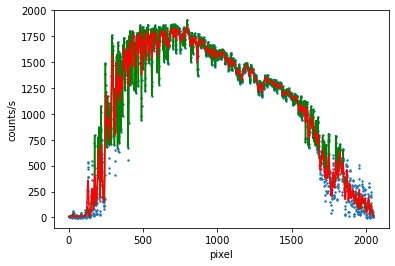

In [37]:
spectrum_star2 = signal_arr_star2-2*a*background_arr_star2

kernel_size=10
kernel = np.ones(kernel_size)/kernel_size
smoothened_spectrum2 = np.convolve(spectrum_star2,kernel,mode='same')
median_smoothened_spectrum2 = outlier_smoother(spectrum_star2,win=kernel_size)

plt.close()

plt.scatter(np.linspace(1,rectified_star2.shape[1],num=rectified_star2.shape[1],endpoint=True,dtype=int),spectrum_star2,s=2)
plt.plot(np.linspace(1,rectified_star2.shape[1],num=rectified_star2.shape[1],endpoint=True,dtype=int),median_smoothened_spectrum2,c='g')
plt.plot(np.linspace(1,rectified_star2.shape[1],num=rectified_star2.shape[1],endpoint=True,dtype=int),smoothened_spectrum2,c='r')
plt.ylabel('counts/s')
plt.xlabel('pixel')

Text(0.5, 0, 'pixel')

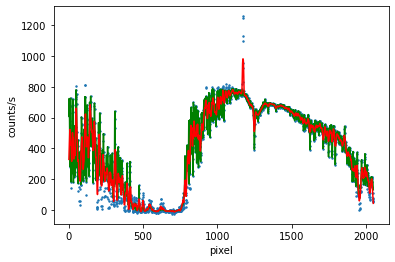

In [38]:
spectrum_star3 = signal_arr_star3-2*a*background_arr_star3

kernel_size=10
kernel = np.ones(kernel_size)/kernel_size
smoothened_spectrum3 = np.convolve(spectrum_star3,kernel,mode='same')
median_smoothened_spectrum3 = outlier_smoother(spectrum_star3,win=kernel_size)

plt.close()

plt.scatter(np.linspace(1,rectified_star3.shape[1],num=rectified_star3.shape[1],endpoint=True,dtype=int),spectrum_star3,s=2)
plt.plot(np.linspace(1,rectified_star3.shape[1],num=rectified_star3.shape[1],endpoint=True,dtype=int),median_smoothened_spectrum3,c='g')
plt.plot(np.linspace(1,rectified_star3.shape[1],num=rectified_star3.shape[1],endpoint=True,dtype=int),smoothened_spectrum3,c='r')

plt.ylabel('counts/s')
plt.xlabel('pixel')

Text(0.5, 0, 'pixel')

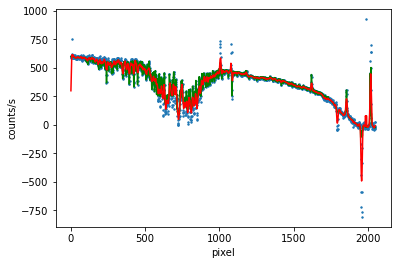

In [39]:
spectrum_star4 = signal_arr_star4-2*a*background_arr_star4

kernel_size=10
kernel = np.ones(kernel_size)/kernel_size
smoothened_spectrum4 = np.convolve(spectrum_star4,kernel,mode='same')
median_smoothened_spectrum4 = outlier_smoother(spectrum_star4,win=kernel_size)

plt.close()

plt.scatter(np.linspace(1,rectified_star4.shape[1],num=rectified_star4.shape[1],endpoint=True,dtype=int),spectrum_star4,s=2)
plt.plot(np.linspace(1,rectified_star4.shape[1],num=rectified_star4.shape[1],endpoint=True,dtype=int),median_smoothened_spectrum4,c='g')
plt.plot(np.linspace(1,rectified_star4.shape[1],num=rectified_star4.shape[1],endpoint=True,dtype=int),smoothened_spectrum4,c='r')
plt.ylabel('counts/s')
plt.xlabel('pixel')

Text(0.5, 0, 'pixel')

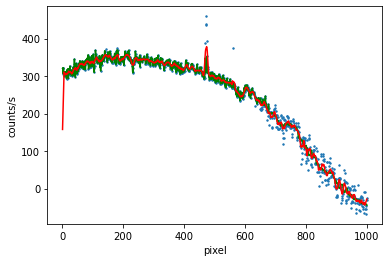

In [40]:
spectrum_star5 = signal_arr_star5-2*a*background_arr_star5

kernel_size=10
kernel = np.ones(kernel_size)/kernel_size
smoothened_spectrum5 = np.convolve(spectrum_star5,kernel,mode='same')
median_smoothened_spectrum5 = outlier_smoother(spectrum_star5,win=kernel_size)

plt.close()

plt.scatter(np.linspace(1,rectified_star5.shape[1],num=rectified_star5.shape[1],endpoint=True,dtype=int),spectrum_star5,s=2)
plt.plot(np.linspace(1,rectified_star5.shape[1],num=rectified_star5.shape[1],endpoint=True,dtype=int),median_smoothened_spectrum5,c='g')
plt.plot(np.linspace(1,rectified_star5.shape[1],num=rectified_star5.shape[1],endpoint=True,dtype=int),smoothened_spectrum5,c='r')

plt.ylabel('counts/s')
plt.xlabel('pixel')

### Telluric Correction

In [41]:
def planck(lam,T):
    # Inputs:
    # lam: an array of wavelengths in microns
    # T: temperature in Kelvins
    # Output:
    # Array of flux densities at each wavelength
    lam = lam*1e-6 # convert from microns to meters
    h = 6.626e-34 # m^2 kg/s
    kb = 1.38e-23 # m^2 kg s^-2 K^-1
    c = 3e8 # m/s
    Blam = (2.0*h*c**2./lam**5.)/(np.exp(h*c/(lam*kb*T))-1) # SI units
    return Blam

In [42]:
#conversion_spectrum=planck(wavelength,9000)/smoothened_spectrum

#### Finding calibration star spectrum

In [43]:
a_cal=5
b_cal=12
c_cal=16

In [44]:
#just copy paste the whole process with different a,b,c values. make sure the upper trace isn't too offset

cal_star_range1_flat = cal_star_flat[785:880][:]
cal_star_range2_flat = cal_star_flat[601:718][:]
cal_star_range3_flat = cal_star_flat[443:587][:]
cal_star_range4_flat = cal_star_flat[245:452][:]
cal_star_range5_flat = cal_star_flat[85:312,0:1000]

rectified_cal_star1 = straighten_spectrum(cal_star_range1_flat,upper_trace_calstar1+65)
rectified_cal_star2 = straighten_spectrum(cal_star_range2_flat,upper_trace_calstar2+80)
rectified_cal_star3 = straighten_spectrum(cal_star_range3_flat,upper_trace_calstar3+100)
rectified_cal_star4 = straighten_spectrum(cal_star_range4_flat,upper_trace_calstar4+150)
rectified_cal_star4 = rectified_cal_star4[50:-10][:]
rectified_cal_star5 = straighten_spectrum(cal_star_range5_flat,upper_trace_calstar5+180)
rectified_cal_star5 = rectified_cal_star5[50:200]

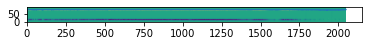

In [45]:
y_upper_cal_star1, _ = findTraces(rectified_cal_star1)

y_upper_cal_star1 = outlier_smoother(y_upper_cal_star1)

plt.close()
plt.imshow(rectified_cal_star1,origin='lower',vmin=np.percentile(rectified_cal_star1,1),vmax=np.percentile(rectified_cal_star1,99))

plt.plot(np.linspace(1,rectified_cal_star1.shape[1],num=rectified_cal_star1.shape[1],endpoint=True,dtype=int),y_upper_cal_star1)

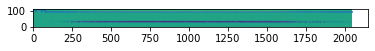

In [46]:
y_upper_cal_star2, _ = findTraces(rectified_cal_star2)

y_upper_cal_star2 = outlier_smoother(y_upper_cal_star2)

plt.close()
plt.imshow(rectified_cal_star2,origin='lower',vmin=np.percentile(rectified_cal_star2,1),vmax=np.percentile(rectified_cal_star2,99))

plt.plot(np.linspace(1,rectified_cal_star2.shape[1],num=rectified_cal_star2.shape[1],endpoint=True,dtype=int),y_upper_cal_star2)

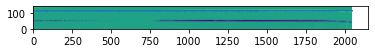

In [47]:
y_upper_cal_star3, _ = findTraces(rectified_cal_star3)

y_upper_cal_star3 = outlier_smoother(y_upper_cal_star3,win=300)

plt.close()
plt.imshow(rectified_cal_star3,origin='lower',vmin=np.percentile(rectified_cal_star3,1),vmax=np.percentile(rectified_cal_star3,99))

plt.plot(np.linspace(1,rectified_cal_star3.shape[1],num=rectified_cal_star3.shape[1],endpoint=True,dtype=int),y_upper_cal_star3)

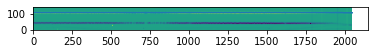

In [48]:
y_upper_cal_star4, _ = findTraces(rectified_cal_star4)

y_upper_cal_star4 = outlier_smoother(y_upper_cal_star4,win=200)

plt.close()
plt.imshow(rectified_cal_star4,origin='lower',vmin=np.percentile(rectified_cal_star4,1),vmax=np.percentile(rectified_cal_star4,99))

plt.plot(np.linspace(1,rectified_cal_star4.shape[1],num=rectified_cal_star4.shape[1],endpoint=True,dtype=int),y_upper_cal_star4)

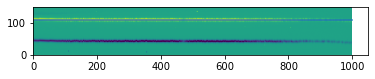

In [49]:
y_upper_cal_star5, _ = findTraces(rectified_cal_star5)

y_upper_cal_star5 = outlier_smoother(y_upper_cal_star5,win=200)

plt.close()
plt.imshow(rectified_cal_star5,origin='lower',vmin=np.percentile(rectified_cal_star5,1),vmax=np.percentile(rectified_cal_star5,99))

plt.plot(np.linspace(1,rectified_cal_star5.shape[1],num=rectified_cal_star5.shape[1],endpoint=True,dtype=int),y_upper_cal_star5)

In [50]:
signal_arr_cal_star1 = np.zeros(rectified_cal_star1.shape[1])
background_arr_cal_star1 = np.zeros(rectified_cal_star1.shape[1])

for i in range(0,rectified_cal_star1.shape[1]):
    for j in range(-1*a_cal,a_cal+1):
        signal_arr_cal_star1[i] += rectified_cal_star1[y_upper_cal_star1.astype(int)[i]+j][i]
    for j in range(c_cal,b_cal+1):
        background_arr_cal_star1[i] += rectified_cal_star1[y_upper_cal_star1.astype(int)[i]+j][i]+rectified_cal_star1[y_upper_cal_star1.astype(int)[i]-j][i]

background_arr_cal_star1 = background_arr_cal_star1/(c_cal-b_cal+1)

signal_arr_cal_star2 = np.zeros(rectified_cal_star2.shape[1])
background_arr_cal_star2 = np.zeros(rectified_cal_star2.shape[1])

for i in range(0,rectified_cal_star2.shape[1]):
    for j in range(-1*a_cal,a_cal+1):
        signal_arr_cal_star2[i] += rectified_cal_star2[y_upper_cal_star2.astype(int)[i]+j][i]
    for j in range(c_cal,b_cal+1):
        background_arr_cal_star2[i] += rectified_cal_star2[y_upper_cal_star2.astype(int)[i]+j][i]+rectified_cal_star2[y_upper_cal_star2.astype(int)[i]-j][i]

background_arr_cal_star2 = background_arr_cal_star2/(c_cal-b_cal+1)

signal_arr_cal_star3 = np.zeros(rectified_cal_star3.shape[1])
background_arr_cal_star3 = np.zeros(rectified_cal_star3.shape[1])

for i in range(0,rectified_cal_star3.shape[1]):
    for j in range(-1*a_cal,a_cal+1):
        signal_arr_cal_star3[i] += rectified_cal_star3[y_upper_cal_star3.astype(int)[i]+j][i]
    for j in range(c_cal,b_cal+1):
        background_arr_cal_star3[i] += rectified_cal_star3[y_upper_cal_star3.astype(int)[i]+j][i]+rectified_cal_star3[y_upper_cal_star3.astype(int)[i]-j][i]

background_arr_cal_star3 = background_arr_cal_star3/(c_cal-b_cal+1)

signal_arr_cal_star4 = np.zeros(rectified_cal_star4.shape[1])
background_arr_cal_star4 = np.zeros(rectified_cal_star4.shape[1])

for i in range(0,rectified_cal_star4.shape[1]):
    for j in range(-1*a_cal,a_cal+1):
        signal_arr_cal_star4[i] += rectified_cal_star4[y_upper_cal_star4.astype(int)[i]+j][i]
    for j in range(c_cal,b_cal+1):
        background_arr_cal_star4[i] += rectified_cal_star4[y_upper_cal_star4.astype(int)[i]+j][i]+rectified_cal_star4[y_upper_cal_star4.astype(int)[i]-j][i]

background_arr_cal_star4 = background_arr_cal_star4/(c_cal-b_cal+1)

signal_arr_cal_star5 = np.zeros(rectified_cal_star5.shape[1])
background_arr_cal_star5 = np.zeros(rectified_cal_star5.shape[1])

for i in range(0,rectified_cal_star5.shape[1]):
    for j in range(-1*a_cal,a_cal+1):
        signal_arr_cal_star5[i] += rectified_cal_star5[y_upper_cal_star5.astype(int)[i]+j][i]
    for j in range(c_cal,b_cal+1):
        background_arr_cal_star5[i] += rectified_cal_star5[y_upper_cal_star5.astype(int)[i]+j][i]+rectified_cal_star5[y_upper_cal_star5.astype(int)[i]-j][i]

background_arr_cal_star5 = background_arr_cal_star5/(c_cal-b_cal+1)

Text(0.5, 0, 'wavelength (angstrom)')

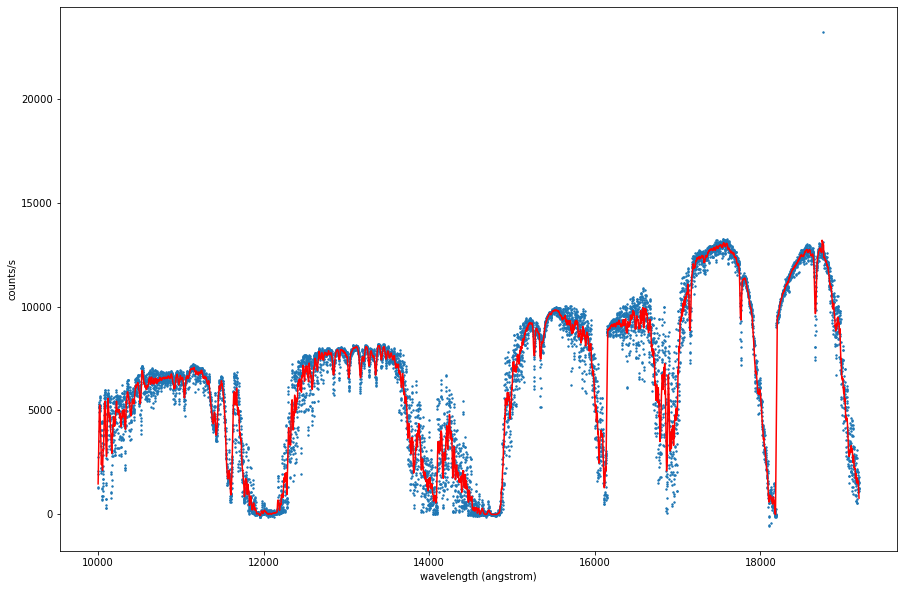

In [51]:
spectrum_cal_star1 = signal_arr_cal_star1-2*a*background_arr_cal_star1
spectrum_cal_star2 = signal_arr_cal_star2-2*a*background_arr_cal_star2
spectrum_cal_star3 = signal_arr_cal_star3-2*a*background_arr_cal_star3
spectrum_cal_star4 = signal_arr_cal_star4-2*a*background_arr_cal_star4
spectrum_cal_star5 = signal_arr_cal_star5-2*a*background_arr_cal_star5

spectrum_cal_star=spectrum_cal_star1
spectrum_cal_star=np.append(spectrum_cal_star,spectrum_cal_star2)
spectrum_cal_star=np.append(spectrum_cal_star,spectrum_cal_star3)
spectrum_cal_star=np.append(spectrum_cal_star,spectrum_cal_star4)
spectrum_cal_star=np.append(spectrum_cal_star,spectrum_cal_star5)

kernel_size=20
kernel = np.ones(kernel_size)/kernel_size
smoothened_cal_spectrum = np.convolve(spectrum_cal_star,kernel,mode='same')
median_smoothened_cal_spectrum = outlier_smoother(spectrum_cal_star,win=kernel_size)

plt.close()

plt.figure(figsize=(15,10))
plt.scatter(10000+np.linspace(1,rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],num=rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],endpoint=True,dtype=int),spectrum_cal_star,s=2)
#plt.plot(np.linspace(1,rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],num=rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],endpoint=True,dtype=int),median_smoothened_cal_spectrum,c='g')
plt.plot(10000+np.linspace(1,rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],num=rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],endpoint=True,dtype=int),smoothened_cal_spectrum,c='r')
plt.ylabel('counts/s')
plt.xlabel('wavelength (angstrom)')

#2.166 micron H wavelength brackett gamma

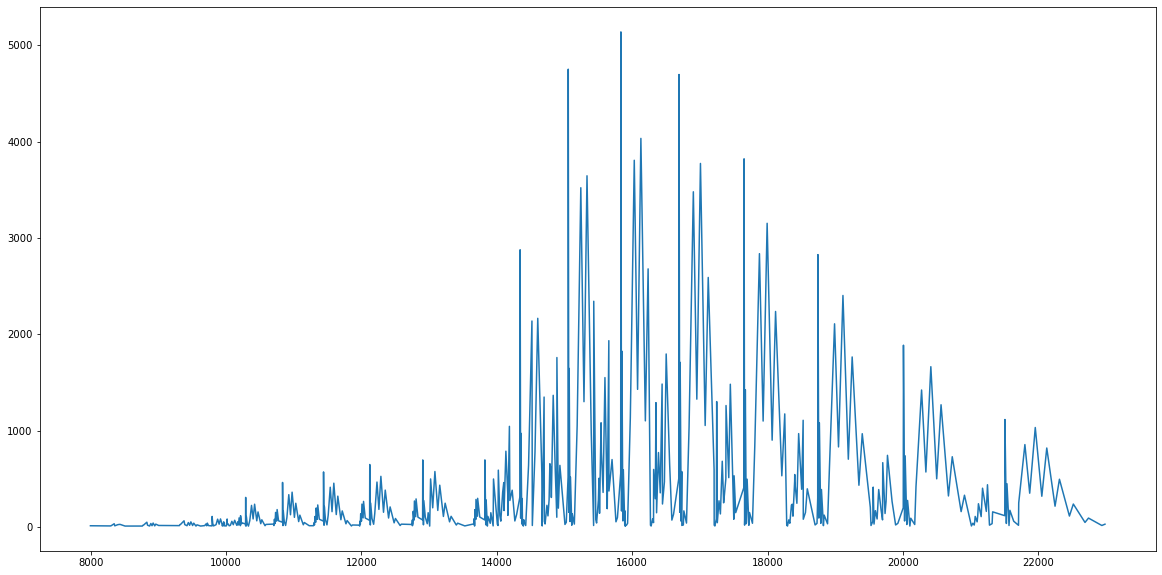

In [52]:
file='https://sites.astro.caltech.edu/~lah/ay107/ay107.OHlinelist.txt'
OHlines = np.genfromtxt(file,usecols = (0,1))

#plt.scatter(OHlines[:][0],OHlines[:][1])
OHlines = np.reshape(OHlines,(511,2))
OHlines

OH_x=[]
OH_y=[]

for e in OHlines:
    OH_x.append(e[0])
    OH_y.append(e[1])
    
OH_x=np.array(OH_x)
OH_y=np.array(OH_y)

plt.figure(figsize=(20,10))
plt.plot(OH_x,OH_y)

Text(0.5, 0, 'wavelength (angstrom)')

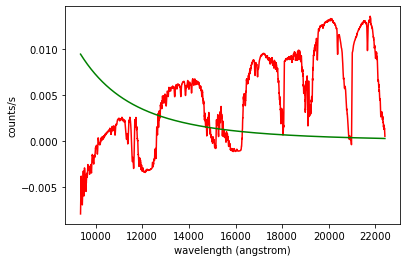

In [53]:
#find wavelength relationship
#take difference between planck spectrum and above spectrum

pixels=np.linspace(1,rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],num=rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],endpoint=True,dtype=int)
wavelength = 3610.0/2541.0*pixels+23757410.0/2541.0

#telluric_correction=planck(wavelength,8750)-spectrum_cal_star

#plt.scatter(wavelength,spectrum_cal_star,s=2)
#plt.plot(np.linspace(1,rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],num=rectified_cal_star1.shape[1]+rectified_cal_star2.shape[1]+rectified_cal_star3.shape[1]+rectified_cal_star4.shape[1]+rectified_cal_star5.shape[1],endpoint=True,dtype=int),median_smoothened_cal_spectrum,c='g')
plt.plot(wavelength,smoothened_cal_spectrum/(100000000*np.max(planck(wavelength,8750)))-planck(wavelength,8750),c='r')
plt.plot(wavelength,planck(wavelength,8750),c='g')
plt.ylabel('counts/s')
plt.xlabel('wavelength (angstrom)')

Text(0.5, 0, 'wavelength (angstrom)')

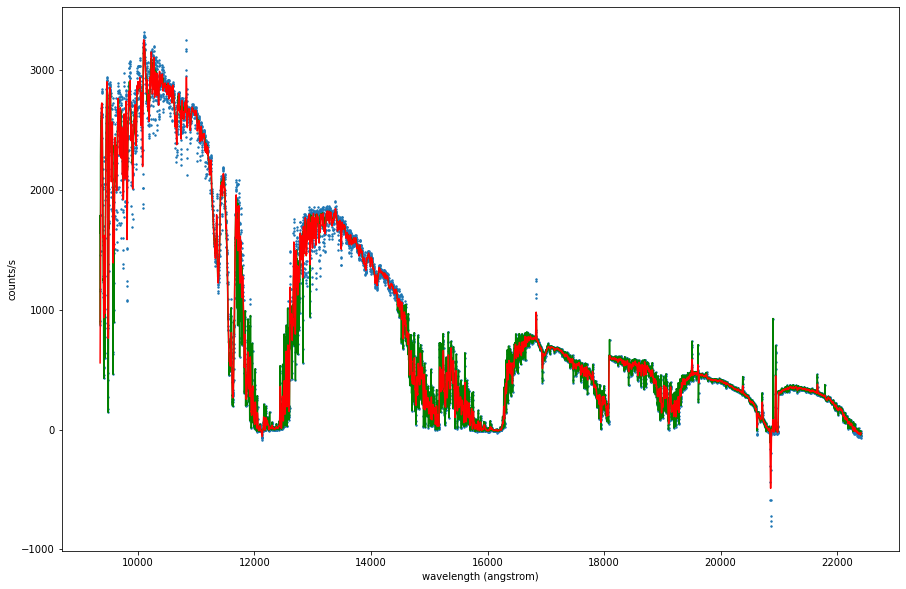

In [54]:
plt.figure(figsize=(15,10))

plt.scatter(wavelength,spectrum_star,s=2)
plt.plot(wavelength,median_smoothened_spectrum,c='g')
plt.plot(wavelength,smoothened_spectrum,c='r')
plt.ylabel('counts/s')
plt.xlabel('wavelength (angstrom)')

Text(0.5, 1.0, 'V347 Aurigae spectrum')

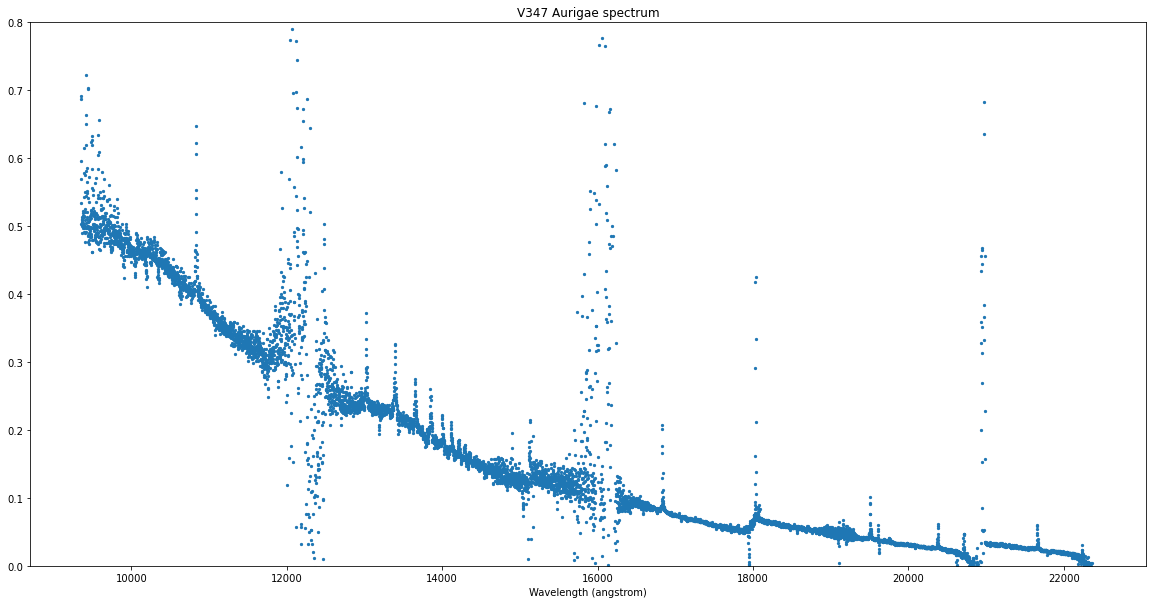

In [55]:
final_spectrum=spectrum_star/spectrum_cal_star
plt.figure(figsize=(20,10))
plt.scatter(wavelength,final_spectrum,s=5)
plt.ylim(0,0.8)
#first 10830, He-1
plt.xlabel('Wavelength (angstrom)')
plt.title('V347 Aurigae spectrum')

In [56]:
#1042 pixel corresponds to 10830
#8665 pixel corresponds to 21660

In [58]:
# First Band:
# 880 22125.518
# 906 22052.366
# 1475 20412.680
# 1500 20339.497
# 1696 19771.862

# m and b
# -0.0002889457474838208 2.4671416317285635

m_1 = -0.0002889457474838208
b_1 = 2.4671416317285635

x_1 = np.array([880,906,1475,1500,1696])
y_1 = np.array([22125.518,22052.366,20412.680,20339.497,19771.862])

pixel_1 = np.linspace(1,rectified_cal_star1.shape[1],num=rectified_cal_star1.shape[1],endpoint=True,dtype=int)

wavelength_1 = m_1 * pixel_1 + b_1

# Second Band:
# 1 1184 15972.596
# 2 186 18118.494
# 3 1521 15240.954

# m and b 
# -0.00021590025183689941 1.8527520838253733

m_2 = -0.00021590025183689941
b_2 = 1.8527520838253733

x_2 = np.array([1184, 186, 1521])
y_2 = np.array([15972.596,18118.494,15240.954])

pixel_2 = np.linspace(1,rectified_cal_star2.shape[1],num=rectified_cal_star2.shape[1],endpoint=True,dtype=int)

wavelength_2 = m_2 * pixel_2 + b_2

# Third Band:
# 1 931 13210.848
# 2 994 13156.793
# 3 1401 12423.347

# m and b
# -0.00017324814500741981 1.484808440656137

m_3 = -0.00017324814500741981
b_3 = 1.484808440656137

x_3 = np.array([931,994,1401])
y_3 = np.array([13210.848,13156.793,12423.347])

pixel_3 = np.linspace(1,rectified_cal_star3.shape[1],num=rectified_cal_star3.shape[1],endpoint=True,dtype=int)

wavelength_3 = m_3 * pixel_3 + b_3

# Fourth Band:
# 1 981 10975.331
# 2 999 10951.349
# 3 65 12286.988

# m and b
# -0.00013443786656615236 1.1740321214323417

m_4 = -0.00013443786656615236
b_4 = 1.1740321214323417

x_4 = np.array([981,999,65])
y_4 = np.array([10975.331,10951.349,12286.988])

pixel_4 = np.linspace(1,rectified_cal_star4.shape[1],num=rectified_cal_star4.shape[1],endpoint=True,dtype=int)

wavelength_4 = m_4 * pixel_4 + b_4

Text(0.5, 1.0, 'V347 Aurigae spectrum (Band 1)')

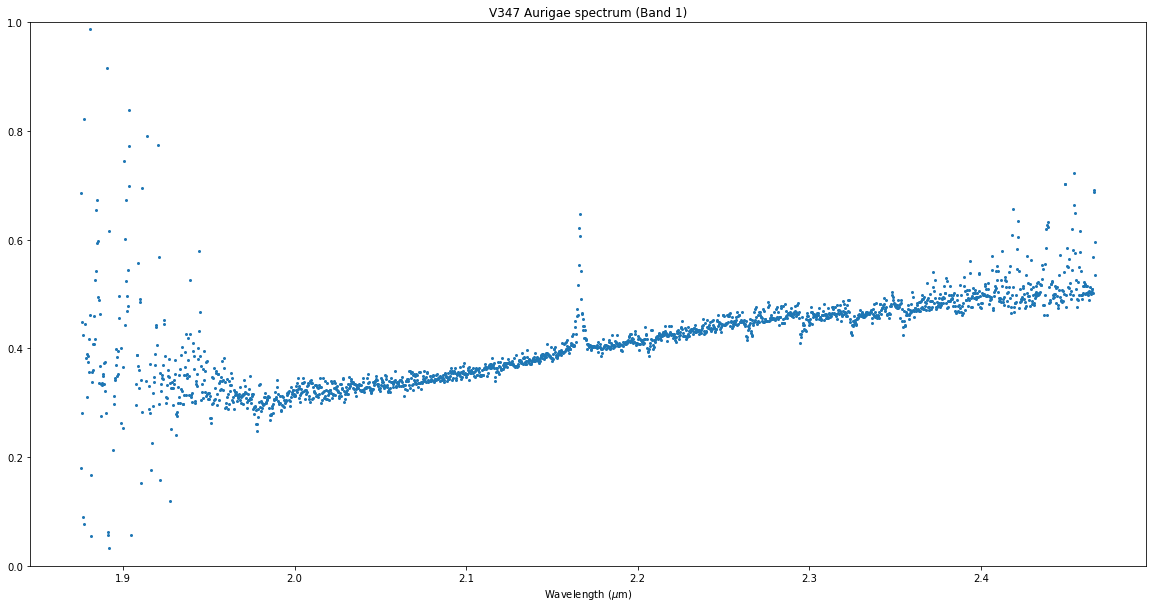

In [75]:
final_spectrum_1=spectrum_star1/spectrum_cal_star1
plt.figure(figsize=(20,10))
plt.scatter(wavelength_1,final_spectrum_1,s=4)
plt.ylim(0,1)
#first 10830, He-1
plt.xlabel('Wavelength ($\mu$m)')
plt.title('V347 Aurigae spectrum (Band 1)')

Text(0.5, 1.0, 'V347 Aurigae spectrum (Band 2)')

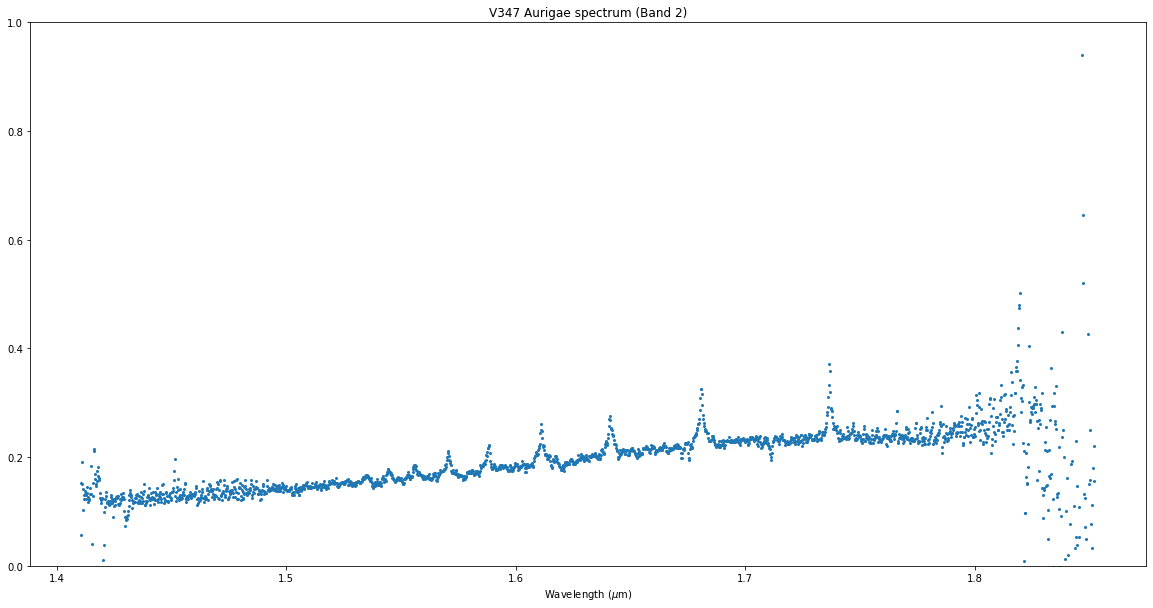

In [76]:
final_spectrum_2=spectrum_star2/spectrum_cal_star2
plt.figure(figsize=(20,10))
plt.scatter(wavelength_2,final_spectrum_2,s=4)
plt.ylim(0,1)
#first 10830, He-1
plt.xlabel('Wavelength ($\mu$m)')
plt.title('V347 Aurigae spectrum (Band 2)')

Text(0.5, 1.0, 'V347 Aurigae spectrum (Band 3)')

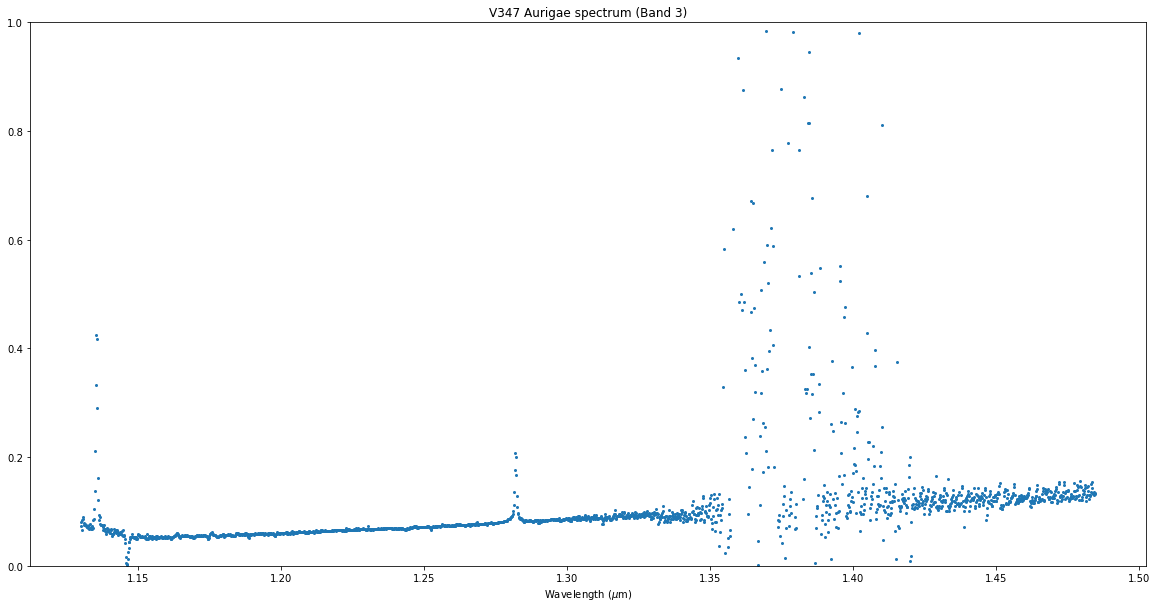

In [77]:
final_spectrum_3=spectrum_star3/spectrum_cal_star3
plt.figure(figsize=(20,10))
plt.scatter(wavelength_3,final_spectrum_3,s=4)
plt.ylim(0,1)
#first 10830, He-1
plt.xlabel('Wavelength ($\mu$m)')
plt.title('V347 Aurigae spectrum (Band 3)')

Text(0.5, 1.0, 'V347 Aurigae spectrum (Band 4)')

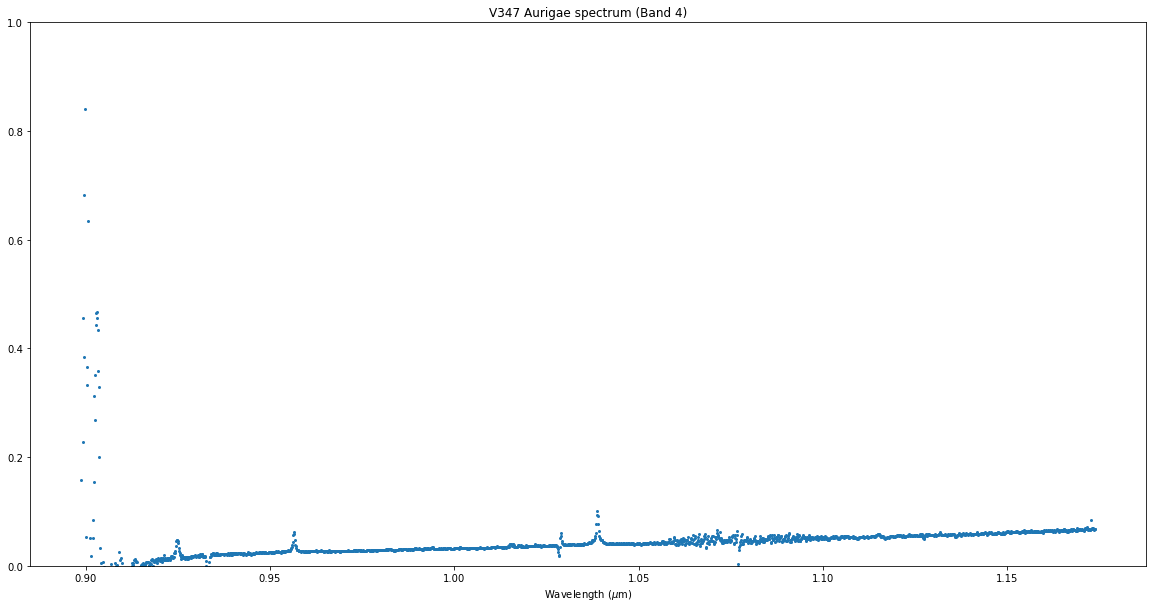

In [78]:
final_spectrum_4=spectrum_star4/spectrum_cal_star4
plt.figure(figsize=(20,10))
plt.scatter(wavelength_4,final_spectrum_4,s=4)
plt.ylim(0,1)
#first 10830, He-1
plt.xlabel('Wavelength ($\mu$m)')
plt.title('V347 Aurigae spectrum (Band 4)')

Text(0.5, 1.0, 'V347 Aurigae spectrum')

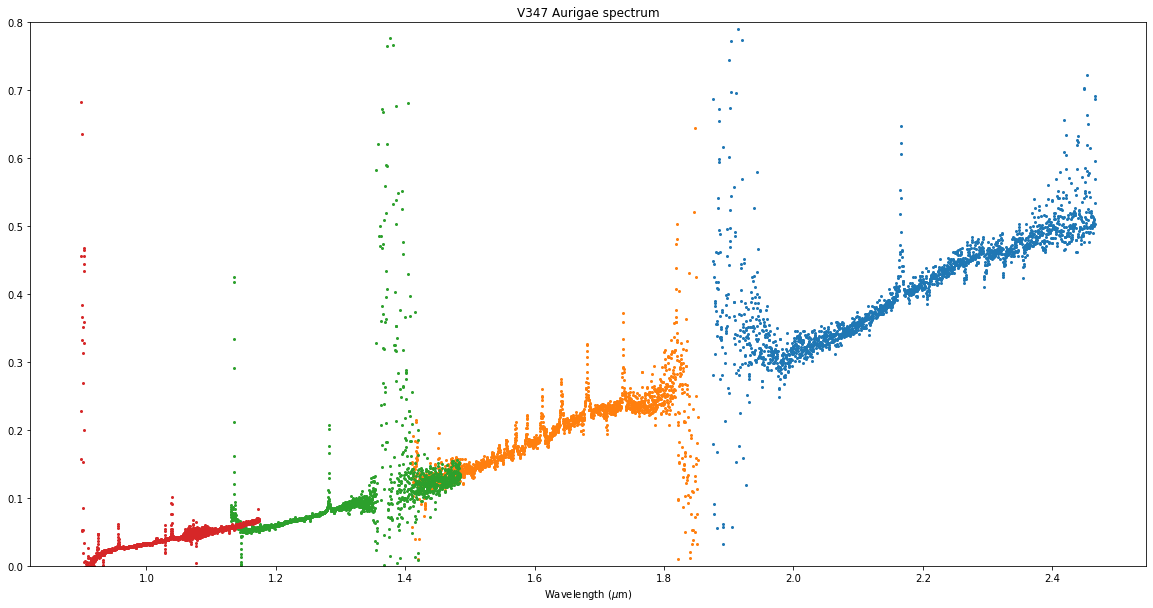

In [82]:
final_spectrum_1=spectrum_star1/spectrum_cal_star1
plt.figure(figsize=(20,10))
plt.scatter(wavelength_1,final_spectrum_1,s=4)
plt.ylim(0,0.8)
#first 10830, He-1

final_spectrum_2=spectrum_star2/spectrum_cal_star2

plt.scatter(wavelength_2,final_spectrum_2,s=4)

#first 10830, He-1

final_spectrum_3=spectrum_star3/spectrum_cal_star3

plt.scatter(wavelength_3,final_spectrum_3,s=4)

#first 10830, He-1

final_spectrum_4=spectrum_star4/spectrum_cal_star4

plt.scatter(wavelength_4,final_spectrum_4,s=4)

#first 10830, He-1
plt.xlabel('Wavelength ($\mu$m)')
plt.title('V347 Aurigae spectrum')